In [1]:
from draw_MR import *
from degreeAnalysis import *
import networkx as NX

import matplotlib
%matplotlib inline

# Exercise B.2

Construct metabolite/reaction graph 'fructose anaerobic'

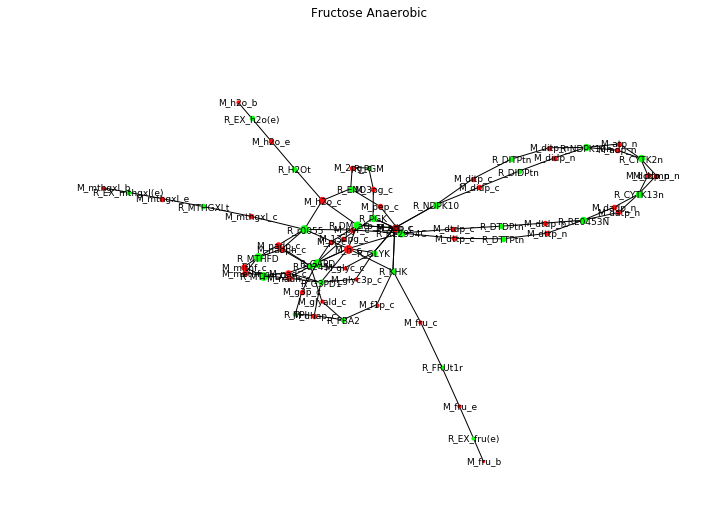

In [2]:
txt = "graphtxt/EX_fru(e)False.txt"
nl, el = read_MR_txt(path=txt)
G = draw_MR_Graph(nl, el)

## Calculate the distance

calculate the distance from root `R_DM_apt_c_` to all of the other nodes in the graph.
With or without the weights

The following calculates the distance using my implementation of Dijkstra algorithm.

In [3]:
d1 = my_dijkstra('R_DM_atp_c_', G, weight='weight')
d2 = my_dijkstra('R_DM_atp_c_', G, weight=1)

print 'Source node R_DM_atp_c_ weighted distance:'
for k,v in d1.items():
    print k,':', v

print '\nSource node R_DM_atp_c_ unweighted distance:'
for k,v in d2.items():
    print k, ':', v

Source node R_DM_atp_c_ weighted distance:
M_13dpg_c : 300.0
M_mlthf_c : 500.0
M_dadp_n : 700.0
M_glyc_c : 200.0
R_CYTK2n : 800.0
R_NDPK10n : 600.0
M_g3p_c : 300.0
M_h_c : 100.0
R_G3PD1 : 150.0
M_dhap_c : 200.0
R_DTTPtn : 400.0
M_pyr_c : 300.0
M_atp_n : 700.0
R_NDPK10 : 200.0
M_nadh_c : 200.0
M_glyald_c : 200.0
M_glyc3p_c : 200.0
M_dtdp_c : 300.0
R_TPI : 300.0
M_atp_c : 100.0
R_PGM : 400.0
R_KHK : 150.0
M_ditp_c : 300.0
R_RE2954C : 200.0
M_nad_c : 200.0
M_ditp_n : 500.0
R_MTHFD : 350.0
M_mthgxl_c : 300.0
M_mthgxl_b : 700.0
R_FBA2 : 250.0
M_3pg_c : 300.0
M_dcmp_n : 900.0
M_nadp_c : 200.0
R_EX_fru(e) : 350.0
M_h2o_c : 100.0
M_h2o_b : 500.0
M_didp_n : 500.0
R_EX_h2o(e) : 400.0
M_2pg_c : 300.0
R_MTHFD2 : 350.0
R_r0245 : 150.0
R_r0055 : 200.0
M_adp_n : 700.0
R_MTHGXLt : 400.0
M_dcdp_n : 900.0
R_PGK : 200.0
M_pep_c : 300.0
R_EX_mthgxl(e) : 600.0
M_adp_c : 100.0
M_f1p_c : 200.0
M_nadph_c : 200.0
M_methf_c : 500.0
R_ENO : 200.0
R_H2Ot : 200.0
M_fru_e : 300.0
M_dtdp_n : 500.0
M_fru_c : 200.0
M_

Using Dijkstra in module `networkx`.
After comparing the result, we can see that the it is the same as `my_dijkstra`.

In [4]:
for node in G.nodes():
    print "R_DM_atp_c_ ->", node, "(unweighted):",\
        NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node, weight=1)
    print "R_DM_atp_c_ ->", node, "(weighted):",\
        NX.algorithms.dijkstra_path_length(G, "R_DM_atp_c_", node)
    print ""

R_DM_atp_c_ -> M_13dpg_c (unweighted): 3
R_DM_atp_c_ -> M_13dpg_c (weighted): 300.0

R_DM_atp_c_ -> M_mlthf_c (unweighted): 5
R_DM_atp_c_ -> M_mlthf_c (weighted): 500.0

R_DM_atp_c_ -> M_dadp_n (unweighted): 7
R_DM_atp_c_ -> M_dadp_n (weighted): 700.0

R_DM_atp_c_ -> M_glyc_c (unweighted): 3
R_DM_atp_c_ -> M_glyc_c (weighted): 200.0

R_DM_atp_c_ -> R_KHK (unweighted): 2
R_DM_atp_c_ -> R_KHK (weighted): 150.0

R_DM_atp_c_ -> M_g3p_c (unweighted): 3
R_DM_atp_c_ -> M_g3p_c (weighted): 300.0

R_DM_atp_c_ -> R_EX_fru(e) (unweighted): 6
R_DM_atp_c_ -> R_EX_fru(e) (weighted): 350.0

R_DM_atp_c_ -> M_glyald_c (unweighted): 3
R_DM_atp_c_ -> M_glyald_c (weighted): 200.0

R_DM_atp_c_ -> M_dhap_c (unweighted): 3
R_DM_atp_c_ -> M_dhap_c (weighted): 200.0

R_DM_atp_c_ -> R_DTTPtn (unweighted): 4
R_DM_atp_c_ -> R_DTTPtn (weighted): 400.0

R_DM_atp_c_ -> M_pyr_c (unweighted): 3
R_DM_atp_c_ -> M_pyr_c (weighted): 300.0

R_DM_atp_c_ -> M_atp_n (unweighted): 7
R_DM_atp_c_ -> M_atp_n (weighted): 700.0

R_

## some statistics about the degree in the graph

- the degree distribution
- the average degree
- the variance of degree
- rank by degree: hubs

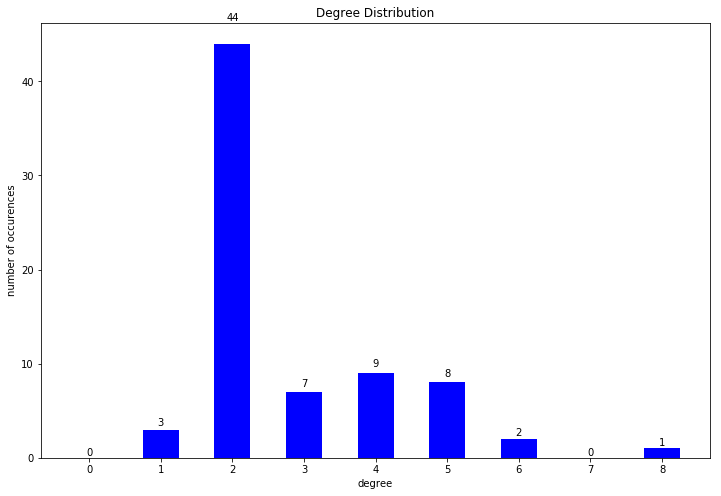

Average degree 2.81081081081
variance: 1.85609934259
Node M_h_c has the greatest degree: 8


{0: 0, 1: 3, 2: 44, 3: 7, 4: 9, 5: 8, 6: 2, 7: 0, 8: 1}

In [5]:
degree_stats(G)

# Exercise B.3

Compartment property of metabolite and reaction

1. construct a frequency table for the number of nodes of the graph 'fructose anaerobic' that belong to a certain compartment

>Finally, in this context, it is worth mentioning that in SBML, there is no requirement for compartment to correspond strictly to cellular structures. Indeed, while SBML uses terms like "species", "reaction", "compartment", it is more of a historical artifact than a limitation of sticking to purely biochemical modeling. SBML is used for more than biochemical models today. 

c : ['M_13dpg_c', 'M_mlthf_c', 'M_glyc_c', 'R_KHK', 'M_g3p_c', 'M_glyald_c', 'M_dhap_c', 'R_DTTPtn', 'M_pyr_c', 'R_NDPK10', 'R_G3PD1', 'M_glyc3p_c', 'R_PGM', 'R_TPI', 'M_atp_c', 'M_3pg_c', 'M_dtdp_c', 'M_ditp_c', 'R_RE2954C', 'M_fru_c', 'R_MTHFD', 'M_mthgxl_c', 'R_FBA2', 'R_GAPD', 'R_GLYK', 'R_FRUt1r', 'M_didp_c', 'M_h2o_c', 'M_h_c', 'M_2pg_c', 'R_MTHFD2', 'M_nadp_c', 'R_r0055', 'R_MTHGXLt', 'M_pep_c', 'M_adp_c', 'R_DITPtn', 'M_f1p_c', 'M_nadph_c', 'M_methf_c', 'R_ENO', 'R_H2Ot', 'M_nad_c', 'R_PGK', 'R_DIDPtn', 'M_pi_c', 'M_nadh_c', 'R_DM_atp_c_', 'R_r0245', 'R_DTDPtn', 'M_dttp_c'] 

b : ['R_EX_fru(e)', 'R_EX_h2o(e)', 'M_mthgxl_b', 'R_EX_mthgxl(e)', 'M_h2o_b', 'M_fru_b'] 

e : ['M_mthgxl_e', 'M_h2o_e', 'M_fru_e'] 

n : ['M_dadp_n', 'M_atp_n', 'R_NDPK10n', 'M_ditp_n', 'M_didp_n', 'M_adp_n', 'M_dcdp_n', 'R_RE0453N', 'M_dtdp_n', 'R_CYTK2n', 'M_dcmp_n', 'M_dttp_n', 'R_CYTK13n', 'M_datp_n'] 

True


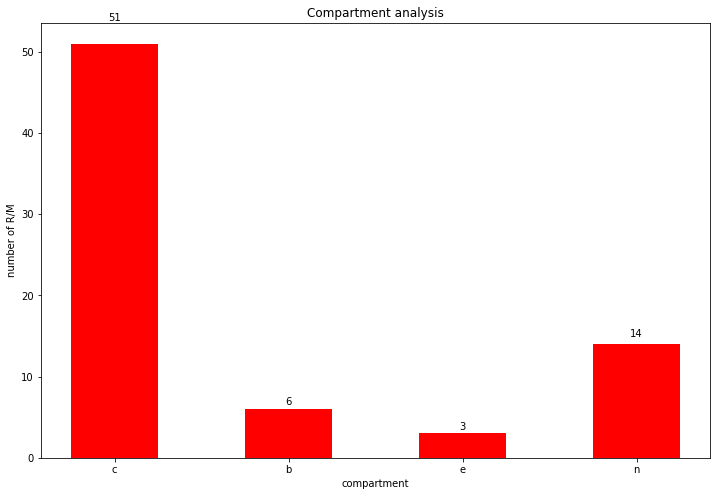

In [6]:
freq_table = compartment_analysis(G)     
node_num = 0
for k,v in freq_table.items():
    print k,":", v, "\n"
    node_num += len(v)
    
print node_num == len(G.nodes())

According to the output **above**, there are 4 reactions in 'fructose anaerobic' graph that happen in compartment nucleus.

1. R_NDPK10n: nucleoside-diphosphate kinase (ATP:dIDP), nuclear
2. R_RE0453N: Nucleoside-diphosphate kinase (name from [EMBL-EBI website](http://www.ebi.ac.uk/intenz/query?cmd=SearchEC&ec=2.7.4.6))
3. R_CYTK2n: cytidylate kinase (dCMP),nuclear https://www.rhea-db.org/reaction.xhtml?id=25094
4. R_CYTK13n: cytidylate kinase (dCMP,dATP),nuclear (UMP/CMP kinase)

Only the following steps of anaerobic respiration process strictly happen in cytoplasm.

- First step: C6H12O6 + Enzyme -> 2 C3H4O3 + 4\[H\] + 2ATP
- Second step: 2 C3H4O3 + 4\[H\] + Enzyme -> 2 C3H6O3



These reaction are all about kinase reactions. From my perspective, I think this is possilbe. Although anaerobic respiration is regarded to only happen in cytoplasm and these reactions are in the fructose anaerobic graph, these reactions are related the consumption of ATP, not synthesis. During the anaerobic respiration process, the cell still need to consume ATP to provide energy for vital activity.

I guess these reactions are vital for the cells all the time and hence is included in this graph. Since they are vital, It is not possible to construct a graph that has the same maximum flux value for 'R\_DM\_atp\_'.
